# EDA techniques to uncover patterns or relationships in data #

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Mall_Customers.csv')  # Load data
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Display the first few rows of the DataFrame for a quick overview
print("First few rows of the DataFrame:")
print (df.head())

# Calculate summary statistics
print(df.describe())

Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
First few rows of the DataFrame:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25

### Step-by-Step EDA Process ###
1. Data Visualization for Univariate Analysis:

Age Distribution: Plot a histogram to understand the age distribution of the customers.
Annual Income Distribution: Similarly, using a histogram to visualize the distribution of the annual income.
Spending Score Distribution: Again, a histogram will help in understanding how the spending scores are distributed.

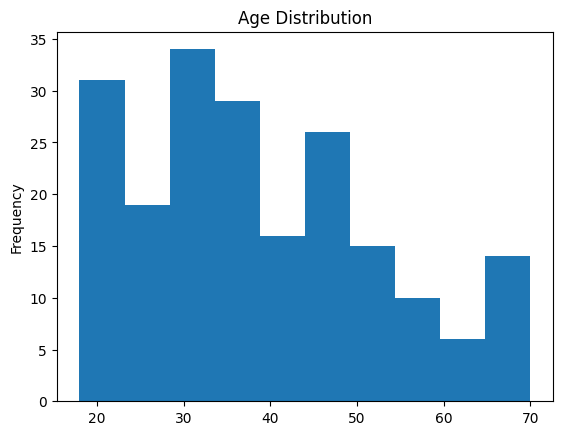

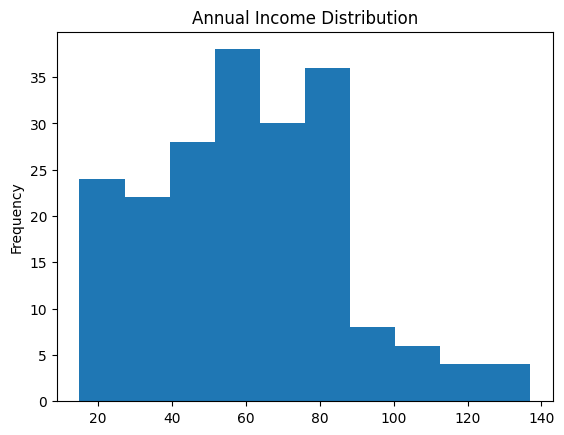

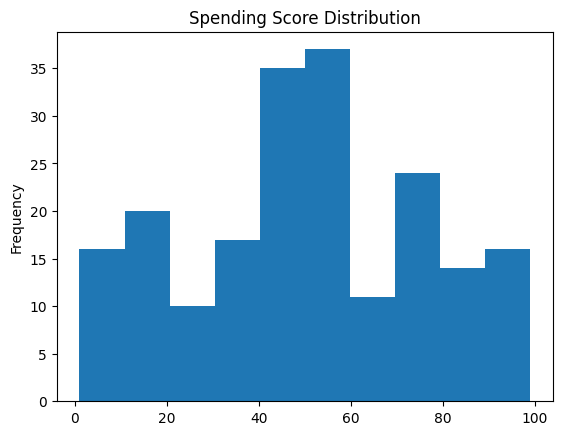

In [2]:
df['Age'].plot(kind='hist', title='Age Distribution')
plt.show()
df['Annual Income (k$)'].plot(kind='hist', title='Annual Income Distribution')
plt.show()
df['Spending Score (1-100)'].plot(kind='hist', title='Spending Score Distribution')
plt.show()


### 2. Bivariate Analysis ###

Age vs. Spending Score: Create a scatter plot to see if there's a relationship between age and spending score.
Annual Income vs. Spending Score: Another scatter plot to explore the relationship between annual income and spending score.

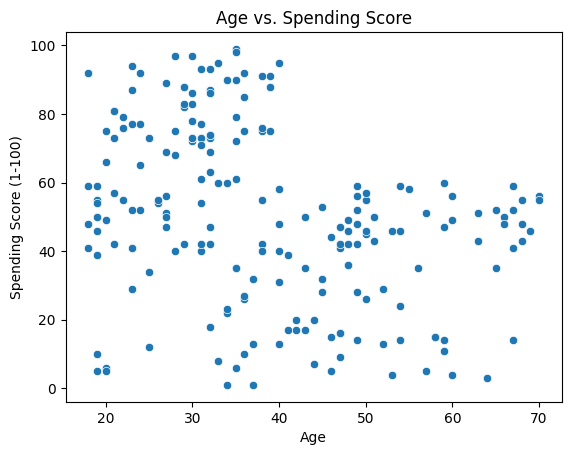

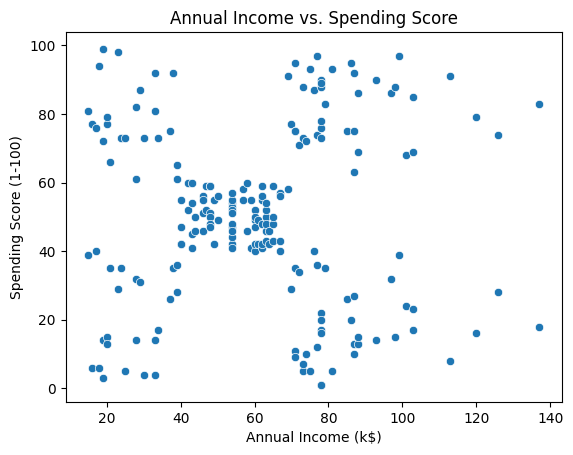

In [3]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df)
plt.title('Age vs. Spending Score')
plt.show()
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Annual Income vs. Spending Score')
plt.show()


### 3. Multivariate Analysis ###

Pair Plot: Using Seaborn's pairplot function to visualize the relationship between all numerical variables.

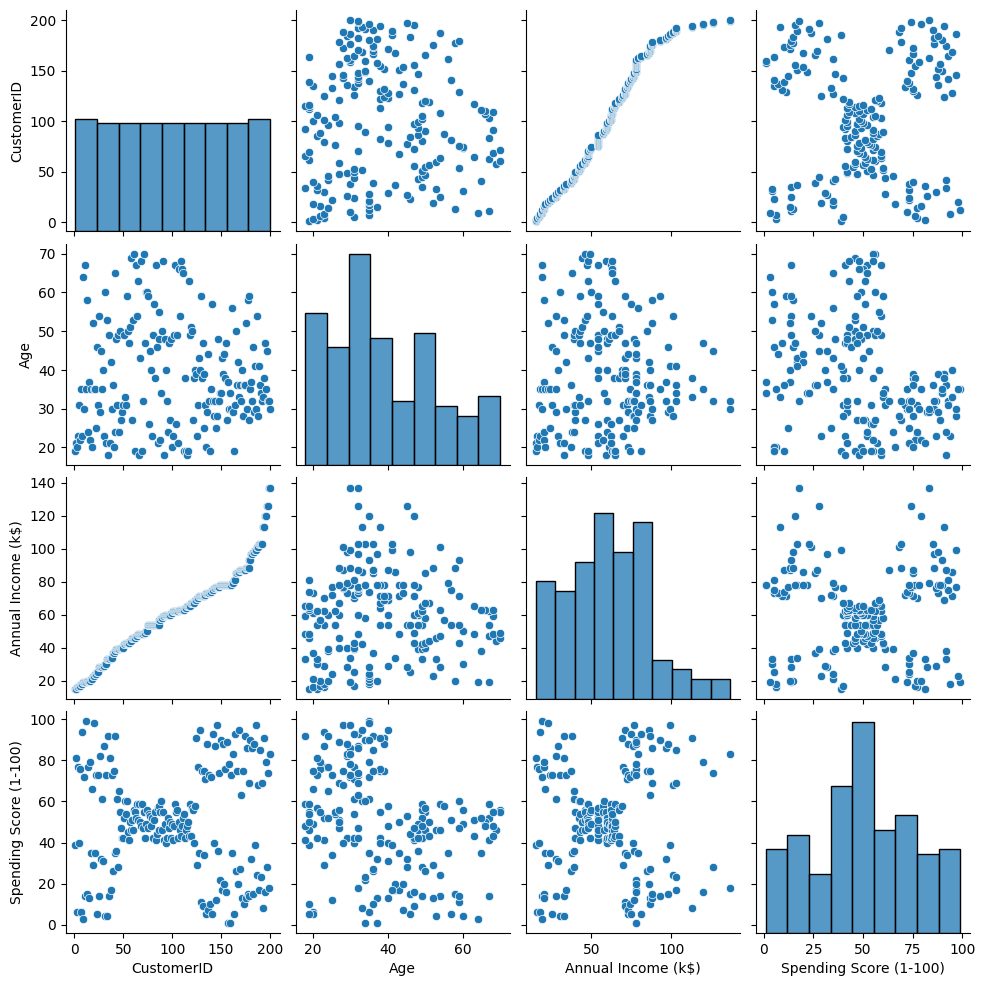

In [4]:
sns.pairplot(df)
plt.show()

### 4. Gender-Based Analysis ###

Gender Distribution: Using a count plot to visualize the number of males and females in the dataset.
Gender vs. Spending Score: Box plot to compare the spending scores across genders.


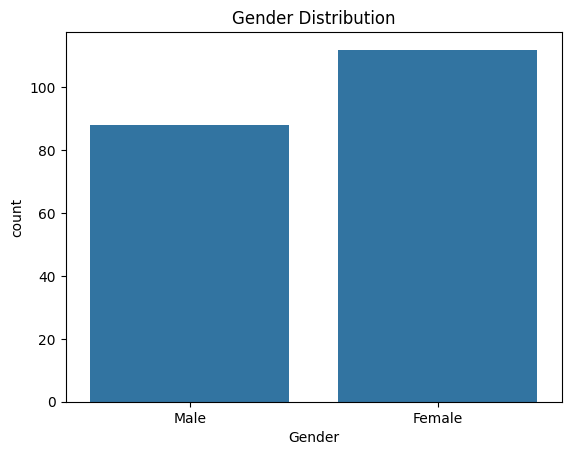

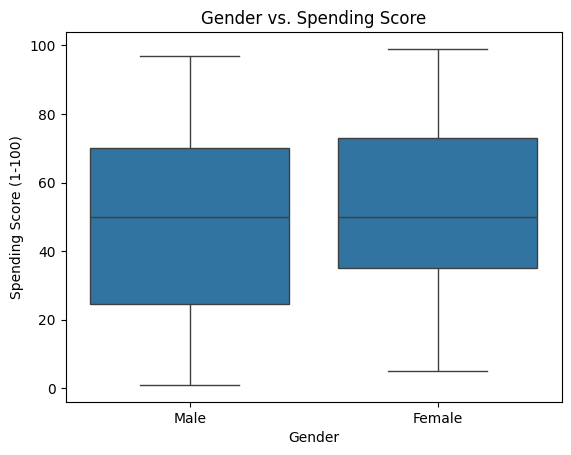

In [5]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Gender vs. Spending Score')
plt.show()


### 5. Correlation Analysis ###

Correlation Matrix: Using a heatmap to visualize the correlation between numerical variables.


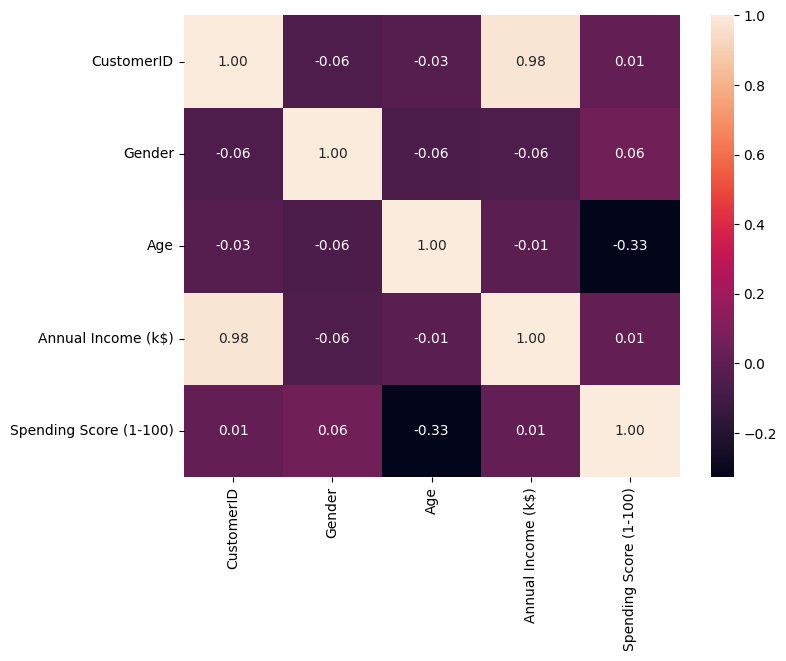

In [7]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()


### 6. Clustering (Optional Advanced Analysis) ###

K-Means Clustering: Applying K-Means clustering to segment customers based on features like income and spending score.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


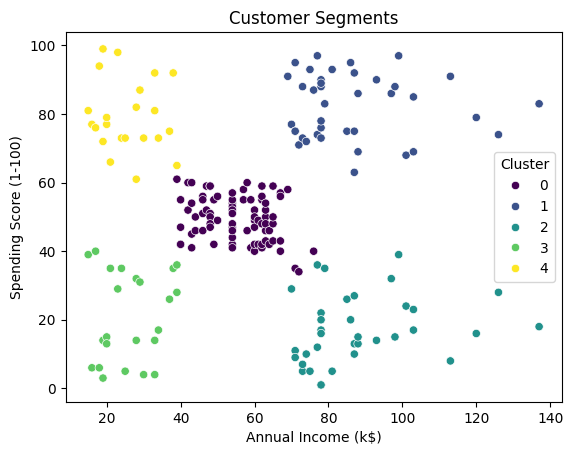

In [8]:
from sklearn.cluster import KMeans
#Clustering based on Annual Income and Spending Score
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
df['Cluster'] = kmeans.labels_
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segments')
plt.show()
